In [1]:
appl_df<-read.csv("appl_stock_prices.csv")


In [2]:
# chosign only required cols
#appl_df<-appl_df[, c('Open','High','Low','Volume','Moving Average 7','Moving Average 14','Close')]

In [3]:
print(nrow(appl_df))


[1] 10853


In [4]:
head(appl_df)

,Date,Open,High,Low,Close,Adj.Close,Volume,Ticker
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.09905771,469033600,AAPL
2,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.09388982,175884800,AAPL
3,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.08699851,105728000,AAPL
4,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.08915183,86441600,AAPL
5,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.09173656,73449600,AAPL
6,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.09733512,48630400,AAPL


In [5]:
summary(appl_df)

     Date                Open                High                Low           
 Length:10853       Min.   :  0.04967   Min.   :  0.04967   Min.   :  0.04911  
 Class :character   1st Qu.:  0.29464   1st Qu.:  0.30134   1st Qu.:  0.28795  
 Mode  :character   Median :  0.50893   Median :  0.51786   Median :  0.50223  
                    Mean   : 20.05803   Mean   : 20.27764   Mean   : 19.84689  
                    3rd Qu.: 18.89571   3rd Qu.: 19.04393   3rd Qu.: 18.71286  
                    Max.   :198.02000   Max.   :199.62000   Max.   :197.00000  
     Close             Adj.Close            Volume             Ticker         
 Min.   :  0.04911   Min.   :  0.0379   Min.   :0.000e+00   Length:10853      
 1st Qu.:  0.29464   1st Qu.:  0.2407   1st Qu.:1.161e+08   Class :character  
 Median :  0.51116   Median :  0.4172   Median :2.090e+08   Mode  :character  
 Mean   : 20.07153   Mean   : 19.2702   Mean   :3.215e+08                     
 3rd Qu.: 18.92429   3rd Qu.: 16.4401   3rd Q

In [6]:
str(appl_df)

'data.frame':	10853 obs. of  8 variables:
 $ Date     : chr  "1980-12-12" "1980-12-15" "1980-12-16" "1980-12-17" ...
 $ Open     : num  0.128 0.122 0.113 0.116 0.119 ...
 $ High     : num  0.129 0.122 0.113 0.116 0.119 ...
 $ Low      : num  0.128 0.122 0.113 0.116 0.119 ...
 $ Close    : num  0.128 0.122 0.113 0.116 0.119 ...
 $ Adj.Close: num  0.0991 0.0939 0.087 0.0892 0.0917 ...
 $ Volume   : num  4.69e+08 1.76e+08 1.06e+08 8.64e+07 7.34e+07 ...
 $ Ticker   : chr  "AAPL" "AAPL" "AAPL" "AAPL" ...


In [7]:
# data cleaning

In [8]:
appl_df$Date <- as.Date(appl_df$Date)

In [9]:
# Remove ticker column
appl_df$Ticker <- NULL

In [10]:
# removing Adj Close column
appl_df$Adj.Close <- NULL

In [11]:
# checking duplicates
dup_rows <- duplicated(appl_df)
num_dup_rows <- sum(dup_rows)
print(paste("Number of dupliate rows is :", num_dup_rows))


[1] "Number of dupliate rows is : 0"


In [12]:
# missing values
missing_values <- colSums(is.na(appl_df))
print("Missing values in each column: ")
print(missing_values)


[1] "Missing values in each column: "
  Date   Open   High    Low  Close Volume 
     0      0      0      0      0      0 


In [13]:
num_cols <-ncol(appl_df)
num_dep_var<-1
num_indep_var<- num_cols - num_dep_var
cat("Number of independent variables:", num_indep_var, "\n")
cat("Number of dependent variables:", num_dep_var, "\n")


Number of independent variables: 5 
Number of dependent variables: 1 


In [14]:
install.packages("zoo")
library(zoo)

days_7 <-7
days_14 <-14

appl_df$Moving.Average.7<- rollmean(appl_df$Close,days_7,fill = NA,align = 'right')
appl_df$Moving.Average.14<-rollmean(appl_df$Close,days_14,fill = NA,align = 'right')

appl_df <- na.omit(appl_df)
print(head(appl_df))


Installing package into 'C:/Users/tenyj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'zoo' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tenyj\AppData\Local\Temp\RtmpIxgUjl\downloaded_packages


Warning message:
"package 'zoo' was built under R version 4.3.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




         Date     Open     High      Low    Close   Volume Moving.Average.7
14 1981-01-02 0.154018 0.155134 0.154018 0.154018 21660800        0.1521843
15 1981-01-05 0.151228 0.151228 0.150670 0.150670 35728000        0.1540179
16 1981-01-06 0.144531 0.144531 0.143973 0.143973 45158400        0.1538584
17 1981-01-07 0.138393 0.138393 0.137835 0.137835 55686400        0.1509089
18 1981-01-08 0.135603 0.135603 0.135045 0.135045 39827200        0.1472419
19 1981-01-09 0.142299 0.142857 0.142299 0.142299 21504000        0.1451691
   Moving.Average.14
14         0.1371970
15         0.1387914
16         0.1403858
17         0.1421795
18         0.1435746
19         0.1452487


In [15]:
# preprocesed file
write.csv(appl_df, 'R_preprocessed_appl_stock_prices.csv', row.names = TRUE)


In [16]:
# renaming
colnames(appl_df) <- gsub(" ", "_", colnames(appl_df))
print(colnames(appl_df))


[1] "Date"              "Open"              "High"             
[4] "Low"               "Close"             "Volume"           
[7] "Moving.Average.7"  "Moving.Average.14"


In [17]:
set.seed(42)

total_rows <- nrow(appl_df)
train_size <- floor(0.7 * total_rows)

train_indices <- sample(seq_len(total_rows), size = train_size)
train_data <-appl_df[train_indices, ]
test_data <-appl_df[-train_indices, ]

In [18]:
library(randomForest)

rf_model <-randomForest(Close ~ .,data =train_data,ntree = 100)



Warning message:
"package 'randomForest' was built under R version 4.3.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [19]:
# predictions
predictions_rf <- predict(rf_model, test_data)
mse_rf <- mean((predictions_rf - test_data$Close)^2)
print(paste("MSE for Random forest regression:", mse_rf))

[1] "MSE for Random forest regression: 0.238908226695356"


In [20]:
ss_res <- sum((predictions_rf - test_data$Close)^2)

ss_tot <- sum((test_data$Close - mean(test_data$Close))^2)

r_squared_rf <- 1 - (ss_res / ss_tot)
print(paste("R-squaed for random Forest regression:", r_squared_rf))


[1] "R-squaed for random Forest regression: 0.99986904224672"


In [21]:
library(Metrics)

#  RMSE
rmse_rf <- sqrt(mse_rf)
#  MAE
mae_rf <- mae(test_data$Close,predictions_rf)

print(paste("Root Mean Squared Error (RMSE):", rmse_rf))
print(paste("Mean Absolute Error (MAE):", mae_rf))


Warning message:
"package 'Metrics' was built under R version 4.3.3"


[1] "Root Mean Squared Error (RMSE): 0.488782391965337"
[1] "Mean Absolute Error (MAE): 0.156077201463212"


In [22]:
install.packages("ggplot2", dependencies = TRUE)

Installing package into 'C:/Users/tenyj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tenyj\AppData\Local\Temp\RtmpIxgUjl\downloaded_packages


In [23]:
library(ggplot2)
results_rf <- data.frame(Actual = test_data$Close, Predicted = predictions_rf)


Warning message:
"package 'ggplot2' was built under R version 4.3.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin




`geom_smooth()` using formula = 'y ~ x'


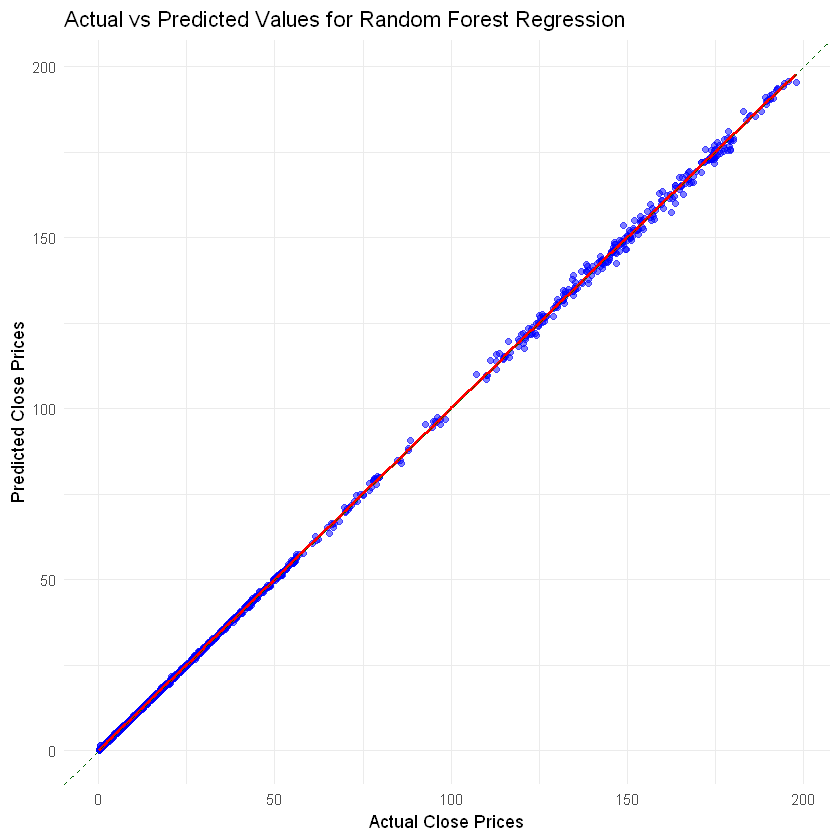

In [24]:
# actual vs Predicted
plot_rf <- ggplot(results_rf, aes(x = Actual, y = Predicted)) +
  geom_point(color = 'blue', alpha = 0.5) +  # Add points
  geom_smooth(method = "lm", se = FALSE, color = "red") +  # Add a linear regression line without standard error
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "darkgreen") +  # Add a 1:1 line
  labs(title = "Actual vs Predicted Values for Random Forest Regression",
       x = "Actual Close Prices",
       y = "Predicted Close Prices") +
  theme_minimal()

print(plot_rf)
